### Copying images to training, validation, and test directories

In [ ]:
import os, shutil

In [ ]:
original_dataset_dir = '/content/drive/MyDrive/kaggle_original_data'

In [ ]:
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [ ]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)


In [ ]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [ ]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [ ]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [ ]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [ ]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)


  
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [ ]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [ ]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [ ]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


### **Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#add dropout layer to mitigate over fiting
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## **Configuring the model for training**

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

## **Data preprocessing**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')


# validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Fitting the model using a batch generator

In [ ]:
# history = model.fit_generator(
# train_generator,
# steps_per_epoch=100,
# epochs=30,
# validation_data=validation_generator,
# validation_steps=50)



history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/100
100/100 [==============================] - 34s 212ms/step - loss: 0.6937 - acc: 0.5165 - val_loss: 0.6842 - val_acc: 0.5520
Epoch 2/100
100/100 [==============================] - 21s 212ms/step - loss: 0.6848 - acc: 0.5460 - val_loss: 0.6912 - val_acc: 0.5460
Epoch 3/100
100/100 [==============================] - 21s 211ms/step - loss: 0.6734 - acc: 0.5705 - val_loss: 0.6474 - val_acc: 0.6150
Epoch 4/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6629 - acc: 0.6045 - val_loss: 0.6674 - val_acc: 0.5800
Epoch 5/100
100/100 [==============================] - 21s 210ms/step - loss: 0.6405 - acc: 0.6205 - val_loss: 0.6258 - val_acc: 0.6520
Epoch 6/100
100/100 [==============================] - 21s 211ms/step - loss: 0.6257 - acc: 0.6460 - val_loss: 0.6058 - val_acc: 0.6690
Epoch 7/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6205 - acc: 0.6520 - val_loss: 0.6257 - val_acc: 0.6450
Epoch 8/100
100/100 [===========================

In [ ]:
# model.save('cats_and_dogs_small_1.h5')
model.save('cats_and_dogs_small_2.h5')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(acc) + 1)

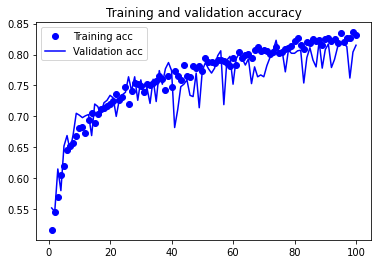

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

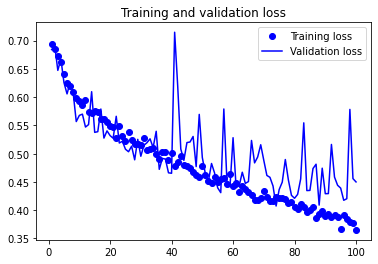

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Setting up a data augmentation configuration via ImageDataGenerator

In [ ]:
#@title
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
#@title
from keras.preprocessing import image

In [ ]:
#@title
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [ ]:
#@title
img_path = fnames[3]

In [ ]:
#@title
img = image.load_img(img_path, target_size=(150, 150))

In [ ]:
#@title
x = image.img_to_array(img)

In [ ]:
#@title
x = x.reshape((1,) + x.shape)

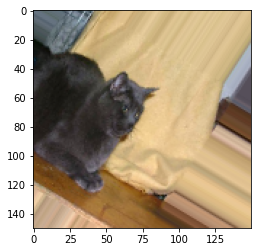

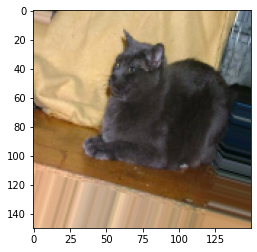

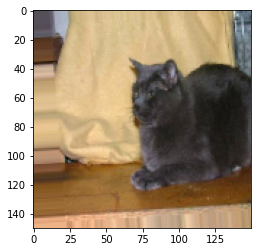

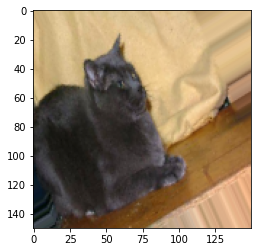

In [ ]:
#@title
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()


In [ ]:
#@title
